In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [8]:
# Function to load JSON data from GitHub raw URLs
def load_github_json(owner, repo, branch, path):
    base_url = f"https://raw.githubusercontent.com/{owner}/{repo}/{branch}/{path}"
    response = requests.get(base_url)
    
    if response.status_code == 200:
        return json.loads(response.text)
    else:
        print(f"Failed to load data: {response.status_code}")
        return None

# Repository information
owner = "zhian-li0126"
repo = "STA220_Project"
branch = "main"

# Load the three JSON files
bbc_data = load_github_json(owner, repo, branch, "data/bbc_ukraine_war_headlines.json")
guardian_data = load_github_json(owner, repo, branch, "data/guardian_ukraine_war_headlines.json")
nyt_data = load_github_json(owner, repo, branch, "data/nyt_ukraine_war_headlines.json")

# Convert to pandas DataFrames for easier analysis
if bbc_data:
    bbc_df = pd.DataFrame(bbc_data)
    print(f"BBC data loaded: {len(bbc_df)} records")
    
if guardian_data:
    guardian_df = pd.DataFrame(guardian_data)
    print(f"Guardian data loaded: {len(guardian_df)} records")
    
if nyt_data:
    nyt_df = pd.DataFrame(nyt_data)
    print(f"NYT data loaded: {len(nyt_df)} records")

# Display the first few rows of each dataset to understand its structure
print("\nBBC Headlines Sample:")
print(bbc_df.head())

print("\nGuardian Headlines Sample:")
print(guardian_df.head())

print("\nNYT Headlines Sample:")
print(nyt_df.head())

BBC data loaded: 2 records
Guardian data loaded: 2 records
NYT data loaded: 2 records

BBC Headlines Sample:
             Hundreds gather at Ukraine war vigil  \
0                                      7 days ago   
1  https://www.bbc.com/news/articles/cqlyrkgkde5o   

        Ukraine war: US-Russia peace talks  \
0                               02-19-2025   
1  https://www.bbc.com/audio/play/p0ks6jlm   

  Performance marks third anniversary of Ukraine war  \
0                                         5 days ago   
1     https://www.bbc.com/news/articles/c778jm8pm4eo   

  Diplomacy gathers pace over war in Ukraine  \
0                                 02-16-2025   
1    https://www.bbc.com/audio/play/p0krp07v   

  Fact-checking Trump claims about war in Ukraine  \
0                                      02-19-2025   
1  https://www.bbc.com/news/articles/c9814k2jlxko   

   Who’s spent what on the war in Ukraine?  \
0                               02-17-2025   
1  https://www.bbc.com/aud

In [ ]:
import pandas as pd
from datetime import datetime, timedelta



def transform_dataset(df):
    
    df = df.T.reset_index()
    df.columns = ['headline', 'date', 'link']
    return df

# Transforming  dataset
bbc_df = transform_dataset(bbc_df)
guardian_df = transform_dataset(guardian_df)
nyt_df = transform_dataset(nyt_df)

# Merge dataset
headlines = pd.concat([bbc_df, guardian_df, nyt_df], ignore_index=True)

# Setting up date, unifying the date format
base_date = datetime(2025, 3, 1)

def convert_time(time_str):
    #transforming time
    if isinstance(time_str, str):
        ts = time_str.strip().lower()
        if 'days ago' in ts:
            try:
                days = int(ts.split('days ago')[0].strip())
                new_date = base_date - timedelta(days=days)
                return new_date.strftime('%Y-%m-%d')
            except:
                return pd.NA
        elif 'hours ago' in ts:
            try:
                hours = int(ts.split('hours ago')[0].strip())
                return '2025-02-28' if hours > 15 else '2025-03-01'
            except:
                return pd.NA
        else:
          
            try:
                dt = pd.to_datetime(time_str, errors='raise')
                return dt.strftime('%Y-%m-%d')
            except:
                return pd.NA
    return pd.NA





headlines['date'] = headlines['date'].apply(convert_time)


headlines.drop(columns=['link'], inplace=True)


print(headlines)

                                                headline        date
0                   Hundreds gather at Ukraine war vigil  2025-02-22
1                     Ukraine war: US-Russia peace talks  2025-02-19
2      Performance marks third anniversary of Ukraine...  2025-02-24
3             Diplomacy gathers pace over war in Ukraine  2025-02-16
4        Fact-checking Trump claims about war in Ukraine  2025-02-19
...                                                  ...         ...
43333    Here’s How to Watch Trump’s Address to Congress  2025-03-04
43334  A Russia-Friendly Region Cheers Trump’s Reorde...  2025-03-04
43335  Here’s What to Watch For in Trump’s Speech to ...  2025-03-04
43336  Why Is Trump Pausing Aid to Ukraine? What to K...  2025-03-04
43337  Ukraine Races to Salvage U.S. Alliance After T...  2025-03-04

[43338 rows x 2 columns]


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')





corpus = headlines['headline'].tolist()

# 2. preprocessing
def preprocess_text(text):
   
    text = text.lower()

    text = re.sub(r'[^a-z0-9\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens


preprocessed_corpus = [preprocess_text(text) for text in corpus]


print("Sample after preprocessing：")
for tokens in preprocessed_corpus[:5]:
    print(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lihaojian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\w

预处理后的语料库样例：
['hundred', 'gather', 'ukraine', 'war', 'vigil']
['ukraine', 'war', 'usrussia', 'peace', 'talk']
['performance', 'mark', 'third', 'anniversary', 'ukraine', 'war']
['diplomacy', 'gather', 'pace', 'war', 'ukraine']
['factchecking', 'trump', 'claim', 'war', 'ukraine']

识别出的人名：
{'Miss Universe', 'Weekend', 'Down', 'Lavrov Discuss Griner', 'Us', 'Unbowed MP', 'Putin Calls America', 'Jennifer Rankin', 'Needs South Korean Artillery Shells', 'Richard Desmond', 'Patients', 'Has Keir Starmer', 'Chef', 'Great Pain', 'Motaz Azaiza', 'Paris Olympics', 'Rash', 'Putin Circle', 'Victoria Azarenka', 'Nicola Sturgeon', 'Sod', 'Lavrov US', 'Canva', 'Yulia Navalnaya', 'Ukrainian Children', 'Dan Jarvis', 'Strikes Rock Russian', 'Dame Margaret Hodge MP', 'Asbestos', 'Listener', 'Diane', 'Mitt Romney', 'Human Rights Act', 'Anne Davies', 'Nostradamus', 'Reduce Gun Violence', 'Cousin Greg', 'Eugene Tenenbaum', 'Putin Would Abide', 'Kill Zelensky', 'Tim Hetherington', 'Threats Remain', 'Sweden Perpl

Top 15 Countries:
Ukraine: 7701
Russia: 5739
UK: 2475
US: 1990
Israel: 1093
China: 689
Australia: 477
Germany: 419
Iran: 259
Poland: 252
France: 190
Sweden: 139
Finland: 136
Italy: 132
India: 129

Top 15 Persons:
Putin: 1864
Biden: 930
Editorial: 367
Boris Johnson: 312
Zelensky: 284
Covid: 185
Brexit: 171
Netanyahu: 168
Johnson: 163
Liz Truss: 152
Rishi Sunak: 149
Kherson: 146
Macron: 140
Joe Biden: 140
Donald Trump: 137

Top 15 Non-Country Locations:
Gaza: 955
Europe: 676
Moscow: 440
U.S.: 435
Britain: 330
Ukrainian: 253
England: 183
Middle East: 157
London: 155
Taiwan: 140
Scotland: 129
America: 97
Africa: 82
Crimea: 78
Paris: 75

Countries DataFrame:
      Country  Frequency
0     Ukraine       7701
1      Russia       5739
2          UK       2475
3          US       1990
4      Israel       1093
5       China        689
6   Australia        477
7     Germany        419
8        Iran        259
9      Poland        252
10     France        190
11     Sweden        139
12    Finland

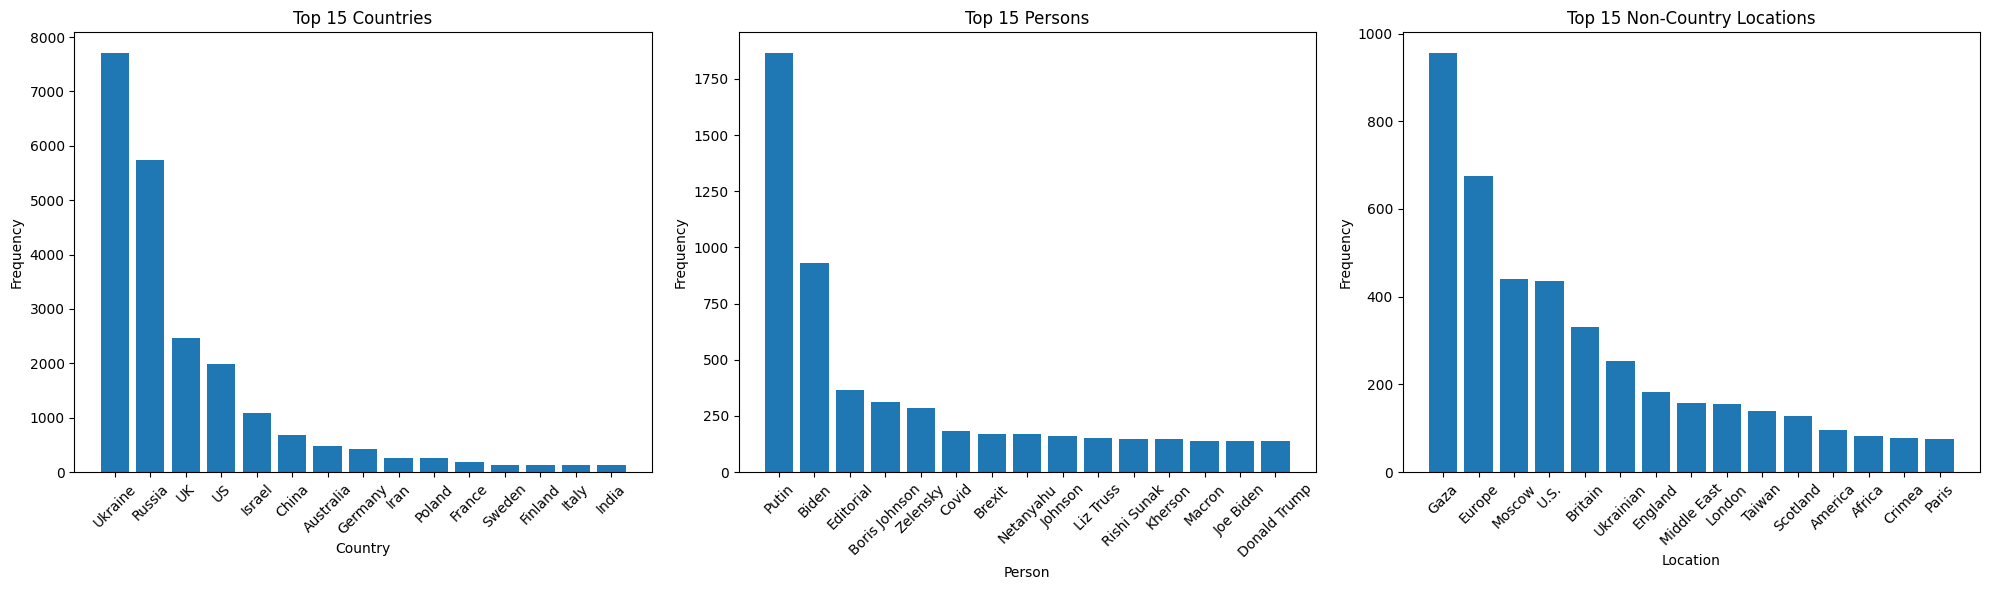

In [ ]:
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# UN members
un_members = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo (Congo-Brazzaville)", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czechia (Czech Republic)",
    "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini (Swaziland)", "Ethiopia", "Fiji", "Finland",
    "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy",
    "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon",
    "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia",
    "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia (Federated States of)",
    "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (Burma)", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia", "Norway", "Oman",
    "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar",
    "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa",
    "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore",
    "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo",
    "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "UK", "US", "uk", "us", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", 
    "Zambia", "Zimbabwe"
]

un_members_set = {country.lower() for country in un_members}

# Recognizing country names in the corpus
nlp = spacy.load("en_core_web_sm")



person_counter = Counter()
country_counter = Counter()
non_country_location_counter = Counter()


for text in corpus:
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            person_counter[ent.text] += 1
        elif ent.label_ in ["GPE", "LOC"]:

            if ent.text.lower() in un_members_set:
                country_counter[ent.text] += 1
            else:
                non_country_location_counter[ent.text] += 1


top_15_countries = country_counter.most_common(15)
top_15_persons = person_counter.most_common(15)
top_15_non_countries = non_country_location_counter.most_common(15)

print("Top 15 Countries:")
for country, count in top_15_countries:
    print(f"{country}: {count}")

print("\nTop 15 Persons:")
for person, count in top_15_persons:
    print(f"{person}: {count}")

print("\nTop 15 Non-Country Locations:")
for loc, count in top_15_non_countries:
    print(f"{loc}: {count}")


df_countries = pd.DataFrame(top_15_countries, columns=['Country', 'Frequency'])
df_persons = pd.DataFrame(top_15_persons, columns=['Person', 'Frequency'])
df_non_countries = pd.DataFrame(top_15_non_countries, columns=['Location', 'Frequency'])

print("\nCountries DataFrame:")
print(df_countries)
print("\nPersons DataFrame:")
print(df_persons)
print("\nNon-Country Locations DataFrame:")
print(df_non_countries)


plt.figure(figsize=(20, 6))


plt.subplot(1, 3, 1)
if top_15_countries:
    countries, counts = zip(*top_15_countries)
    plt.bar(countries, counts)
    plt.title("Top 15 Countries")
    plt.xlabel("Country")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "No Countries Found", ha='center', va='center')


plt.subplot(1, 3, 2)
if top_15_persons:
    persons, counts = zip(*top_15_persons)
    plt.bar(persons, counts)
    plt.title("Top 15 Persons")
    plt.xlabel("Person")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "No Persons Found", ha='center', va='center')


plt.subplot(1, 3, 3)
if top_15_non_countries:
    locations, counts = zip(*top_15_non_countries)
    plt.bar(locations, counts)
    plt.title("Top 15 Non-Country Locations")
    plt.xlabel("Location")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "No Non-Country Locations Found", ha='center', va='center')

plt.tight_layout()
plt.show()




In [ ]:

import pandas as pd


df_persons = pd.DataFrame(person_counter.most_common(), columns=['Person', 'Frequency'])
df_countries = pd.DataFrame(country_counter.most_common(), columns=['Country', 'Frequency'])
df_non_countries = pd.DataFrame(non_country_location_counter.most_common(), columns=['Location', 'Frequency'])


df_persons.to_csv('all_persons.csv', index=False, encoding='utf-8-sig')
df_countries.to_csv('all_countries.csv', index=False, encoding='utf-8-sig')
df_non_countries.to_csv('all_non_countries.csv', index=False, encoding='utf-8-sig')

print("CSV save as：all_persons.csv, all_countries.csv, all_non_countries.csv")


CSV 文件已保存：all_persons.csv, all_countries.csv, all_non_countries.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_persons = pd.read_csv("all_persons_update.csv")
df_countries = pd.read_csv("all_countries_update.csv")
df_locations = pd.read_csv("all_ukraine_location.csv")  


df_persons_top20 = df_persons.sort_values(by='Frequency', ascending=False).head(20)
df_countries_top20 = df_countries.sort_values(by='Frequency', ascending=False).head(20)
df_locations_top20 = df_locations.sort_values(by='Frequency', ascending=False).head(20)

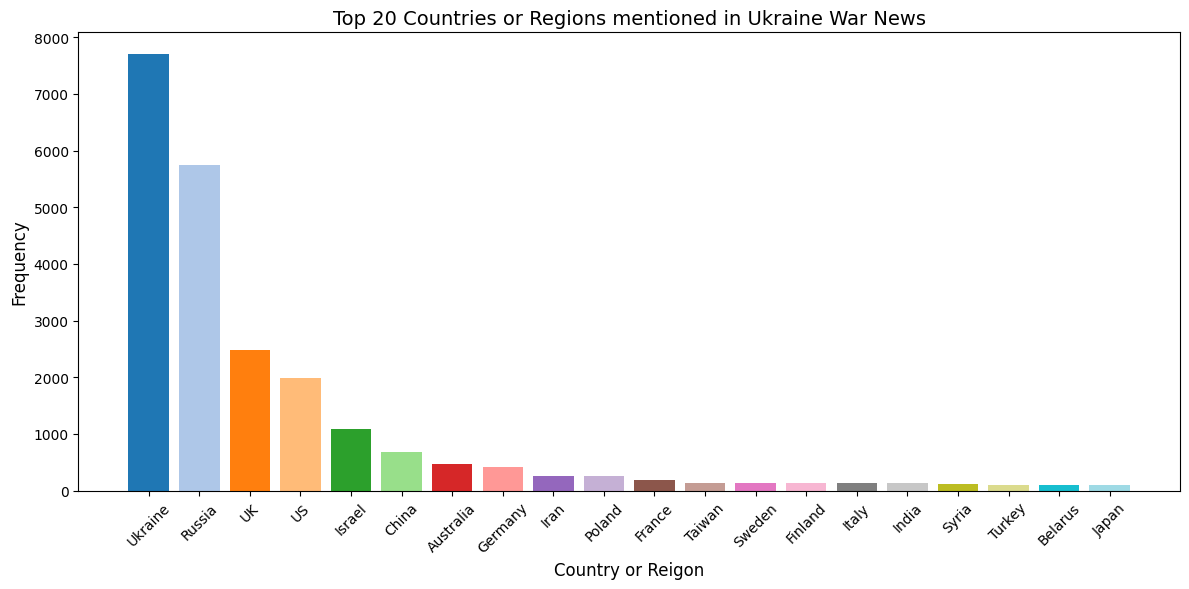

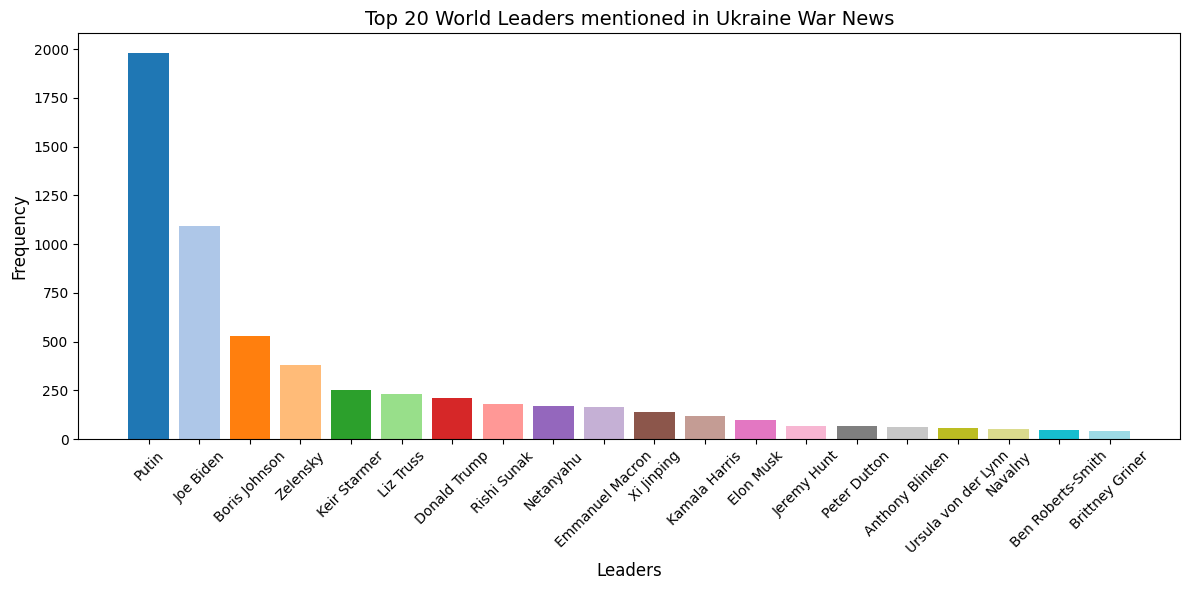

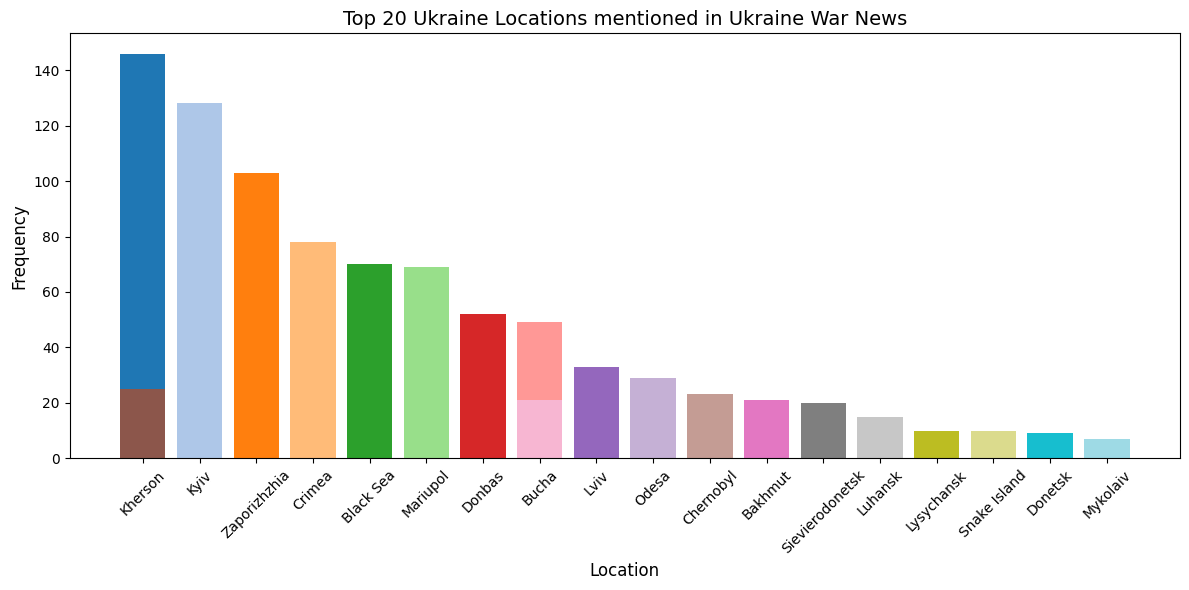

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(df_countries_top20['Country'], df_countries_top20['Frequency'], color=colors)
plt.title("Top 20 Countries or Regions mentioned in Ukraine War News", fontsize=14)
plt.xlabel("Country or Reigon", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(df_persons_top20['Person'], df_persons_top20['Frequency'], color=colors)
plt.title("Top 20 World Leaders mentioned in Ukraine War News", fontsize=14)
plt.xlabel("Leaders", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(df_locations_top20['Location'], df_locations_top20['Frequency'], color=colors)
plt.title("Top 20 Ukraine Locations mentioned in Ukraine War News", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

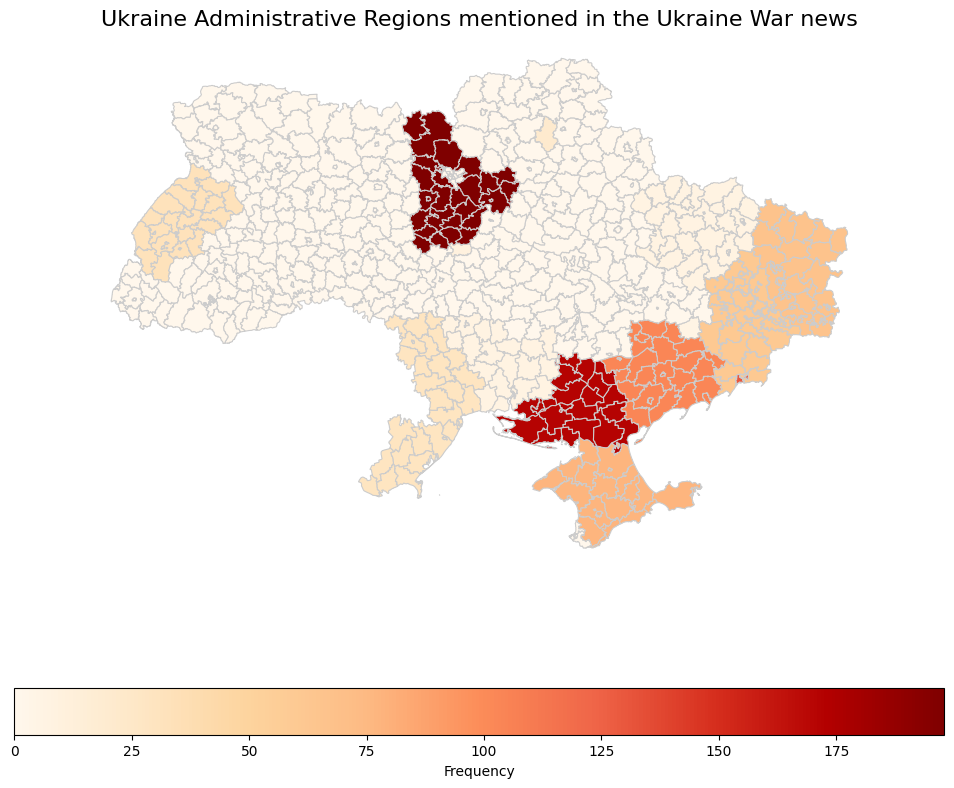

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read Ukraine GEOjson
geo_path = r"C:\Users\lihaojian\OneDrive - Arizona State University\Desktop\UCD 2023-2024\STA220\final project\gadm41_UKR_2.json"
ukraine_geo = gpd.read_file(geo_path)


df_locations["Location"] = df_locations["Location"].str.strip().str.lower()

# If "donbas"exist adding numbers to  "luhansk"and  "donetsk"
if "donbas" in df_locations["Location"].values:
    donbas_freq = df_locations.loc[df_locations["Location"] == "donbas", "Frequency"].sum()
    for region in ["luhansk", "donetsk"]:
        if region in df_locations["Location"].values:
            df_locations.loc[df_locations["Location"] == region, "Frequency"] += donbas_freq
        else:
            df_locations = df_locations.append({"Location": region, "Frequency": donbas_freq}, ignore_index=True)
    df_locations = df_locations[df_locations["Location"] != "donbas"]

# Translating the English to the Ukranian geo code
mapping_dict = {
    "kherson": "kherson",
    "zaporizhzhia": "zaporizhia",
    "kyiv": "kiev",
    "crimea": "crimea",
    "mariupol": "mariupol's'ka",   
    "black sea": None,
    "donbas": ["luhans'k", "donets'k"],  
    "bucha": "kiev",               
    "lviv": "l'viv",
    "odesa": "odessa",
    "chernobyl": None,
    "bakhmut": "bakhmats'kyi",
    "sievierodonetsk": "severodonets'ka",
    "luhansk": "luhans'k",
    "lysychansk": "lysians'kyi",
    "snake island": None,
    "donetsk": "donets'k",
    "mykolaiv": "mykolayiv",
    "kharkiv": "kharkiv",
    "pokrovsk": "pokrovs'kyi",
    "soledar": None,
    "izium": "iziums'ka"
}


mapped_rows = []
for idx, row in df_locations.iterrows():
    loc = row["Location"]
    freq = row["Frequency"]
    if loc in mapping_dict:
        geo_name = mapping_dict[loc]
        if geo_name is None:
            continue  
        elif isinstance(geo_name, list):
            for name in geo_name:
                mapped_rows.append({"geo_name": name.lower(), "Frequency": freq})
        else:
            mapped_rows.append({"geo_name": geo_name.lower(), "Frequency": freq})

df_mapped = pd.DataFrame(mapped_rows)

df_mapped = df_mapped.groupby("geo_name", as_index=False)["Frequency"].sum()

geo_freq_dict = dict(zip(df_mapped["geo_name"], df_mapped["Frequency"]))

# Color the geo
def get_region_frequency(row):
    freq = 0

    if "NAME_1" in row and pd.notnull(row["NAME_1"]):
        region1 = row["NAME_1"].strip().lower()
        freq += geo_freq_dict.get(region1, 0)

    if "NAME_2" in row and pd.notnull(row["NAME_2"]):
        region2 = row["NAME_2"].strip().lower()
        freq += geo_freq_dict.get(region2, 0)
    return freq


ukraine_geo["Frequency"] = ukraine_geo.apply(get_region_frequency, axis=1)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ukraine_geo.plot(column="Frequency", cmap="OrRd", linewidth=0.8, ax=ax,
                 edgecolor="0.8", legend=True,
                 legend_kwds={'label': "Frequency", 'orientation': "horizontal"})

ax.set_title("Ukraine Administrative Regions mentioned in the Ukraine War news", fontsize=16)
ax.set_axis_off()
plt.show()


In [ ]:
import folium
import pandas as pd



df_countries['logFrequency'] = np.log1p(df_countries['Frequency'])

# Download GeoJSON 
world_geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Setting up interactive map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add Choropleth layers df_countries 
choropleth = folium.Choropleth(
    geo_data=world_geo_url,
    name="Choropleth",
    data=df_countries,
    columns=["Country", "logFrequency"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Frequency",
    nan_fill_color="white"
).add_to(m)

# Adding tooltip frequency
folium.GeoJson(
    world_geo_url,
    name="Countries",
    tooltip=folium.features.GeoJsonTooltip(
        fields=["name"],
        aliases=["Country:"]
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Sace the graph
m.save("world_map.html")
print("Interactive world map save as world_map.html")
m


Interactive world map 已保存为 world_map.html
